In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Normalization
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy

In [2]:
""" Creating random data for coffee roasting
    optimum temperatures are 185-250 C
    optimum duration is 12 - 15 minutes
"""

X_train=np.random.rand(400).reshape(-1,2)
# Formula for converting within range is random*(max-min+1)+min
X_train[:,0:1:1]=X_train[:,0:1:1]*(15.5-11.5+1)+11.5
X_train[:,1:2:1]=X_train[:,1:2:1]*(260-175+1)+175

Y_train=np.zeros(len(X_train))
i=0
for a,b in X_train:
    if(a<=15 and a>=12 and b>=185 and b<=250):
        Y_train[i]=1
    else:
        Y_train[i]=0
    i+=1

Y_train=Y_train.reshape(-1,1)

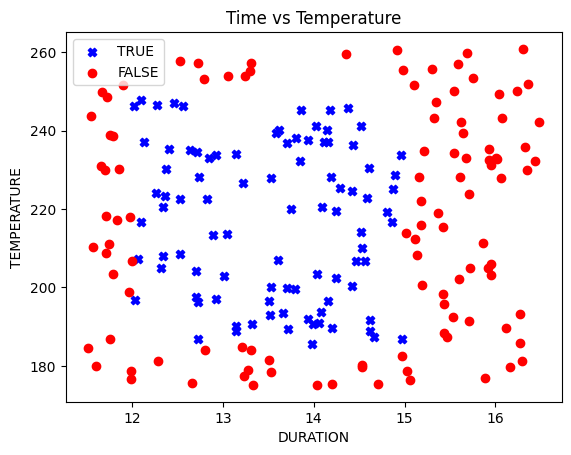

In [3]:
pos=Y_train[:,0]==1
neg=Y_train[:,0]==0

plt.scatter(X_train[pos,0],X_train[pos,1],marker='X',c='b',label="TRUE")
plt.scatter(X_train[neg,0],X_train[neg,1],marker='o',c='r',label="FALSE")
plt.title("Time vs Temperature")
plt.ylabel("TEMPERATURE")
plt.xlabel("DURATION")
plt.legend()
plt.show()

In [4]:
# Normalize the data using mean-variance
# keras contains a Normalisation layer used to reduce the range of data
print("BOFORE NORMALIZATION")
print(f"Temperature max, min:{np.max(X_train[:,1]):0.2f},{np.min(X_train[:,1]):0.2f}")
print(f"Duration max, min:{np.max(X_train[:,0]):0.2f},{np.min(X_train[:,0]):0.2f}")

norm_layer=Normalization(axis=-1)
norm_layer.adapt(X_train)          # First learns mean and variance
X=norm_layer(X_train)              # Then applies mean and variance

print("AFTER NORMALIZATION")
print(f"Temperature max, min:{np.max(X[:,1]):0.2f},{np.min(X[:,1]):0.2f}")
print(f"Duration max, min:{np.max(X[:,0]):0.2f},{np.min(X[:,0]):0.2f}")

BOFORE NORMALIZATION
Temperature max, min:260.89,175.13
Duration max, min:16.48,11.52
AFTER NORMALIZATION
Temperature max, min:1.79,-1.70
Duration max, min:1.75,-1.73


In [5]:
model=Sequential(
    [
        Input(shape=(2,)),
        Dense(units=3,activation='sigmoid',name='L1'),
        Dense(units=1,activation='sigmoid',name='L2')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L2 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
"""
    We have parameters/weights as follow:
    1st LAYER: 3 units: W.shape = (2,3) -> 2 rows 3 columns      Total=6
                        B.shape = (3,)  -> B is scalar           Total=3
    2nd LAYER: 1 units: W.shape = (3,1) -> 3 rows 1 column       Total=3
                        B.shape = (1,)  -> B is scalar           Total=1
                                                                 Total=13
"""
# Now w1 w2 are elements of same column rather than row
W1,B1=model.get_layer('L1').get_weights()
W2,B2=model.get_layer('L2').get_weights()

print(f"W1 = {W1.shape} : \n",W1,f"\nB1 = {B1.shape} : ",B1)
print("\n")
print(f"W2 = {W2.shape} : \n",W2,f"\nB2 = {B2.shape} : ",B2)

W1 = (2, 3) : 
 [[ 1.0634029   0.02310979 -0.91543585]
 [ 0.31869555 -0.3230036  -0.05448568]] 
B1 = (3,) :  [0. 0. 0.]


W2 = (3, 1) : 
 [[-0.99147564]
 [-0.81847703]
 [-0.6075734 ]] 
B2 = (1,) :  [0.]


In [7]:
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(X,Y_train,epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 4ms/step - loss: 0.7854
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7452
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7164
Epoch 4/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6921
Epoch 5/50
7/7 [==============================] - 0s 0s/step - loss: 0.6791
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6707
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6631
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6594
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6554
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6520
Epoch 11/50
7/7 [==============================] - 0s 143us/step - loss: 0.6500
Epoch 12/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6469
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - loss: 0

In [8]:
# Weights have been updated as per loss
W1,B1=model.get_layer('L1').get_weights()
W2,B2=model.get_layer('L2').get_weights()

print(f"W1 = {W1.shape} : \n",W1,f"\nB1 = {B1.shape} : ",B1)
print("\n")
print(f"W2 = {W2.shape} : \n",W2,f"\nB2 = {B2.shape} : ",B2)

W1 = (2, 3) : 
 [[ 3.2329063   1.7314848  -0.33791718]
 [ 0.04355994 -0.4475197  -0.12100904]] 
B1 = (3,) :  [-2.215192   -1.2538017  -0.45996603]


W2 = (3, 1) : 
 [[-2.1270623 ]
 [-0.7718771 ]
 [-0.02471367]] 
B2 = (1,) :  [0.62052184]


In [9]:
# Now we have successfully trained the model
X_test=np.array([
    [15.0000001,220],
    [18,220]])
X_test=norm_layer(X_test)
prediction=model.predict(X_test)
print(prediction)

1/1 [==============================] - 0s 60ms/step
[[0.29532954]
 [0.09450192]]


In [10]:
decision=np.zeros_like(prediction)
for i in range(len(prediction)):
    if(prediction[i]>=0.5):
        decision[i]=1
    else:
        decision[i]=0

print(decision)

[[0.]
 [0.]]
